___
# MINIPROJETO 1

## <font color='red'>Bruno Dratcu</font>
___

## <font color='blue'>VARIÁVEL QUANTITATIVA ESCOLHIDA: Temperatura diaria (em ºC)</font>

___
### Itens 1 a 3 - Resolução:

In [166]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from scipy.stats import norm

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o Semestre\Ciencia dos Dados\CD_nao_bugado\miniporjeto1


In [2]:
notas = pd.read_csv("air_quality.csv", encoding="windows-1252", sep=",")

In [3]:
notas.head()

,Location,Latitude,Longitude,Date Local,Nitrogen dioxide (ppb),Ozone (ppb),Sulfur dioxide (ppb),Mean Daily Temp (Â¡F),Mean Daily Temperature (Â¡C),Preciptation (cm),Wind Speed (Knots),Wind Direction (Degrees),Sea Level Pressure (mb)
0,"N. Little Rock, AR",34.756189,-92.281296,1/1/15,11.55,NaN,1.16,37.0,2.8,0.063,1.7,129,30.3
1,"N. Little Rock, AR",34.756189,-92.281296,1/2/15,13.91,NaN,0.72,40.3,4.6,0.217,5.2,50,30.0
2,"N. Little Rock, AR",34.756189,-92.281296,1/3/15,7.95,NaN,0.65,48.1,8.9,0.548,7.0,236,29.8
3,"N. Little Rock, AR",34.756189,-92.281296,1/4/15,4.11,NaN,0.61,37.1,2.8,0.000,9.6,289,30.1
4,"N. Little Rock, AR",34.756189,-92.281296,1/5/15,8.13,1.97,0.93,29.7,-1.3,0.000,5.2,71,30.4


In [4]:
notas.describe()

C:\Users\Bruno Dratcu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Latitude,Longitude,Nitrogen dioxide (ppb),Ozone (ppb),Sulfur dioxide (ppb),Mean Daily Temp (Â¡F),Mean Daily Temperature (Â¡C),Preciptation (cm),Wind Speed (Knots),Wind Direction (Degrees),Sea Level Pressure (mb)
count,1000.000000,1000.000000,975.000000,996.000000,981.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.811434,-94.558758,12.077662,2.294357,0.369256,69.913126,20.984200,0.051880,5.041300,163.303000,955.707300
std,3.655748,12.625808,8.329424,1.049064,0.859037,13.188637,7.521237,0.149587,2.892374,92.048085,238.112425
min,25.798333,-118.226880,-1.090000,0.000000,-1.000000,23.400000,-17.800000,0.000000,0.000000,-1.000000,29.700000
25%,25.798333,-95.492650,NaN,NaN,NaN,NaN,17.100000,0.000000,2.600000,95.000000,1013.500000
50%,29.721600,-92.281296,NaN,NaN,NaN,NaN,23.000000,0.000000,5.200000,156.500000,1016.300000
75%,34.756189,-80.210278,NaN,NaN,NaN,NaN,26.625000,0.016000,7.000000,228.000000,1019.000000
max,34.756189,-80.210278,46.560000,5.270000,10.430000,88.600000,31.500000,1.710000,18.200000,360.000000,1035.600000


In [5]:
tabela = notas.loc[:, ["Location", "Mean Daily Temperature (Â¡C)", 
                       "Nitrogen dioxide (ppb)", "Ozone (ppb)", 
                       "Sulfur dioxide (ppb)", "Wind Speed (Knots)", 
                       "Sea Level Pressure (mb)", "Wind Direction (Degrees)"]]
#tabela

In [6]:
escolhas = pd.DataFrame()

escolhas["Local"] = tabela["Location"]
escolhas["Media diaria de Temperatura (ºC)"] = tabela["Mean Daily Temperature (Â¡C)"]
escolhas["Velocidade do vento (em nós)"] = tabela["Wind Speed (Knots)"]
escolhas["Pressão do nivel do mar (milibar)"] = tabela["Sea Level Pressure (mb)"]
escolhas["Direção do vento"] = tabela["Wind Direction (Degrees)"]

escolhas["Dioxido de Nitrogenio (ppb)"] = tabela["Nitrogen dioxide (ppb)"]
escolhas["Ozonio (ppb)"] = tabela["Ozone (ppb)"]
escolhas["Dioxido de Sulfato"] = tabela["Sulfur dioxide (ppb)"]

#escolhas

In [7]:
escolhas.Local = tabela.Location.astype('category')
escolhas["Media diaria de Temperatura (ºC)"] = tabela["Mean Daily Temperature (Â¡C)"].astype('category')
escolhas["Velocidade do vento (em nós)"] = tabela["Wind Speed (Knots)"].astype('category')
escolhas["Pressão do nivel do mar (milibar)"] = tabela["Sea Level Pressure (mb)"].astype('category')
escolhas["Direção do vento"] = tabela["Wind Direction (Degrees)"].astype('category')


escolhas["Dioxido de Nitrogenio (ppb)"] = tabela["Nitrogen dioxide (ppb)"].astype('category')
escolhas["Ozonio (ppb)"] = tabela["Ozone (ppb)"].astype('category')
escolhas["Dioxido de Sulfato"] = tabela["Sulfur dioxide (ppb)"].astype('category')

In [8]:
Houston = escolhas[(escolhas.Local=="Houston, TX")]
Miami = escolhas[(escolhas.Local=="Miami, FL")]
LA = escolhas[(escolhas.Local=="Los Angeles, CA")]
LRock = escolhas[(escolhas.Local=="N. Little Rock, AR")]

direcao = Miami["Direção do vento"]
velo = Miami["Velocidade do vento (em nós)"]
temp = Miami["Media diaria de Temperatura (ºC)"]
NO2 = Miami["Dioxido de Nitrogenio (ppb)"]
ozonio = Miami["Ozonio (ppb)"]
SO2 = Miami["Dioxido de Sulfato"]

Minhas distribuições teoricas para modelar minha variavel quantitica são: Weibull & Normal.

count     273
unique    166
top       115
freq        7
Name: Direção do vento, dtype: int64

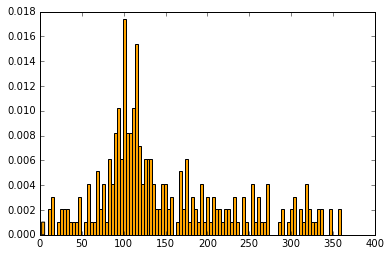

In [99]:
hist = plt.hist(direcao, normed=True, bins=100, color="orange")
#plt.title("Histograma da direção dos ventos de Miami")
#plt.ylabel("Frequência relativa")
hist
direcao.describe()

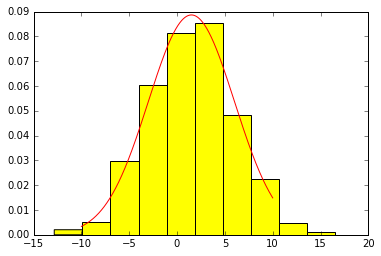

In [162]:
x = np.linspace(-10, 10, 10000)
y = norm.pdf(x, loc=1.5, scale=4.5)

dados = norm.rvs(loc=1.5, scale=4.5, size=2000)
plt.hist(dados, normed=True, color="yellow")
plt.plot(x,y, color="r")

In [170]:
x = direcao.fit()

AttributeError: 'Series' object has no attribute 'fit'

___
### Itens 3 a 6 - Resolução:

___
### Itens 7 a 9 - Resolução:

___
### Itens 10 e 11 - Resolução: